# Decomposing Errors in Gridded Snow Water Equivalent Products in the Upper Colorado River Basin

In [1]:
import pandas as pd
from IPython.display import Image

## Introduction & Background

Because mountain snowpack and its melt dominate the surface hydrology of many regions, seasonal snowpack is an important water resource. It has strong implications for water supply, hydropower, ecological processes, weather, recreation, and regional and global climate. Seasonal snowpack is quantified through snow water equivalent, or SWE. Formally, SWE is the amount of liquid water in a snowpack that would be formed if the snowpack were completely melted.

Formally, SWE is the amount of liquid water in a snowpack that would be formed if the snowpack were completely melted.
Information on SWE is essential for water resource management (e.g. flood forecasting, reservoir management, irrigation scheduling), largely grounded in the economic and safety benefits of water management, is required for validating snow models and GCM snow-cover simulations, and is necessary for climate change monitoring and detection. 
Water from snowpack provides up to $348 billion a year in economic benefit in the WUS.
Given the importance of SWE, efforts have been made to directly collect data on SWE and related quantities.

### Annual Cycle of SWE

The annual cycle of SWE is characterized by a snow accumulation period and a snow melt period. One way of characterizing the snow accumulation and snow melt periods, as introduced and described by Trujillo and Molotch (2014) and Rhoades, Jones, and Ullrich (2018), is by defining a snowpack accumulation start date (SAD), peak SWE date, and a complete snowmelt date (CMD). The following can be defined:
* **Snowpack Accumulation Start Date (SAD)**: first day when SWE $\geq$ 10% of maximum SWE, taken as the beginning of the accumulation season.
* **Peak SWE (SPD)**: Day of maximum SWE.
* **March 1 SWE** and **April 1 SWE**: Sometimes used as proxies for peak SWE by some communities as a standardized date for comparing peak SWE across years and locations. While somewhat arbitrary, this date results from monthly manual snow surveys established early in the twentieth century and is codified into water management as an indicator of warm season streamflow (Siirla Woodburn & Rhoades et al.)
* **Complete Melt Date (CMD)**: first day when SWE $\leq$ 10% of maximum SWE, taken as the end of the melt season.

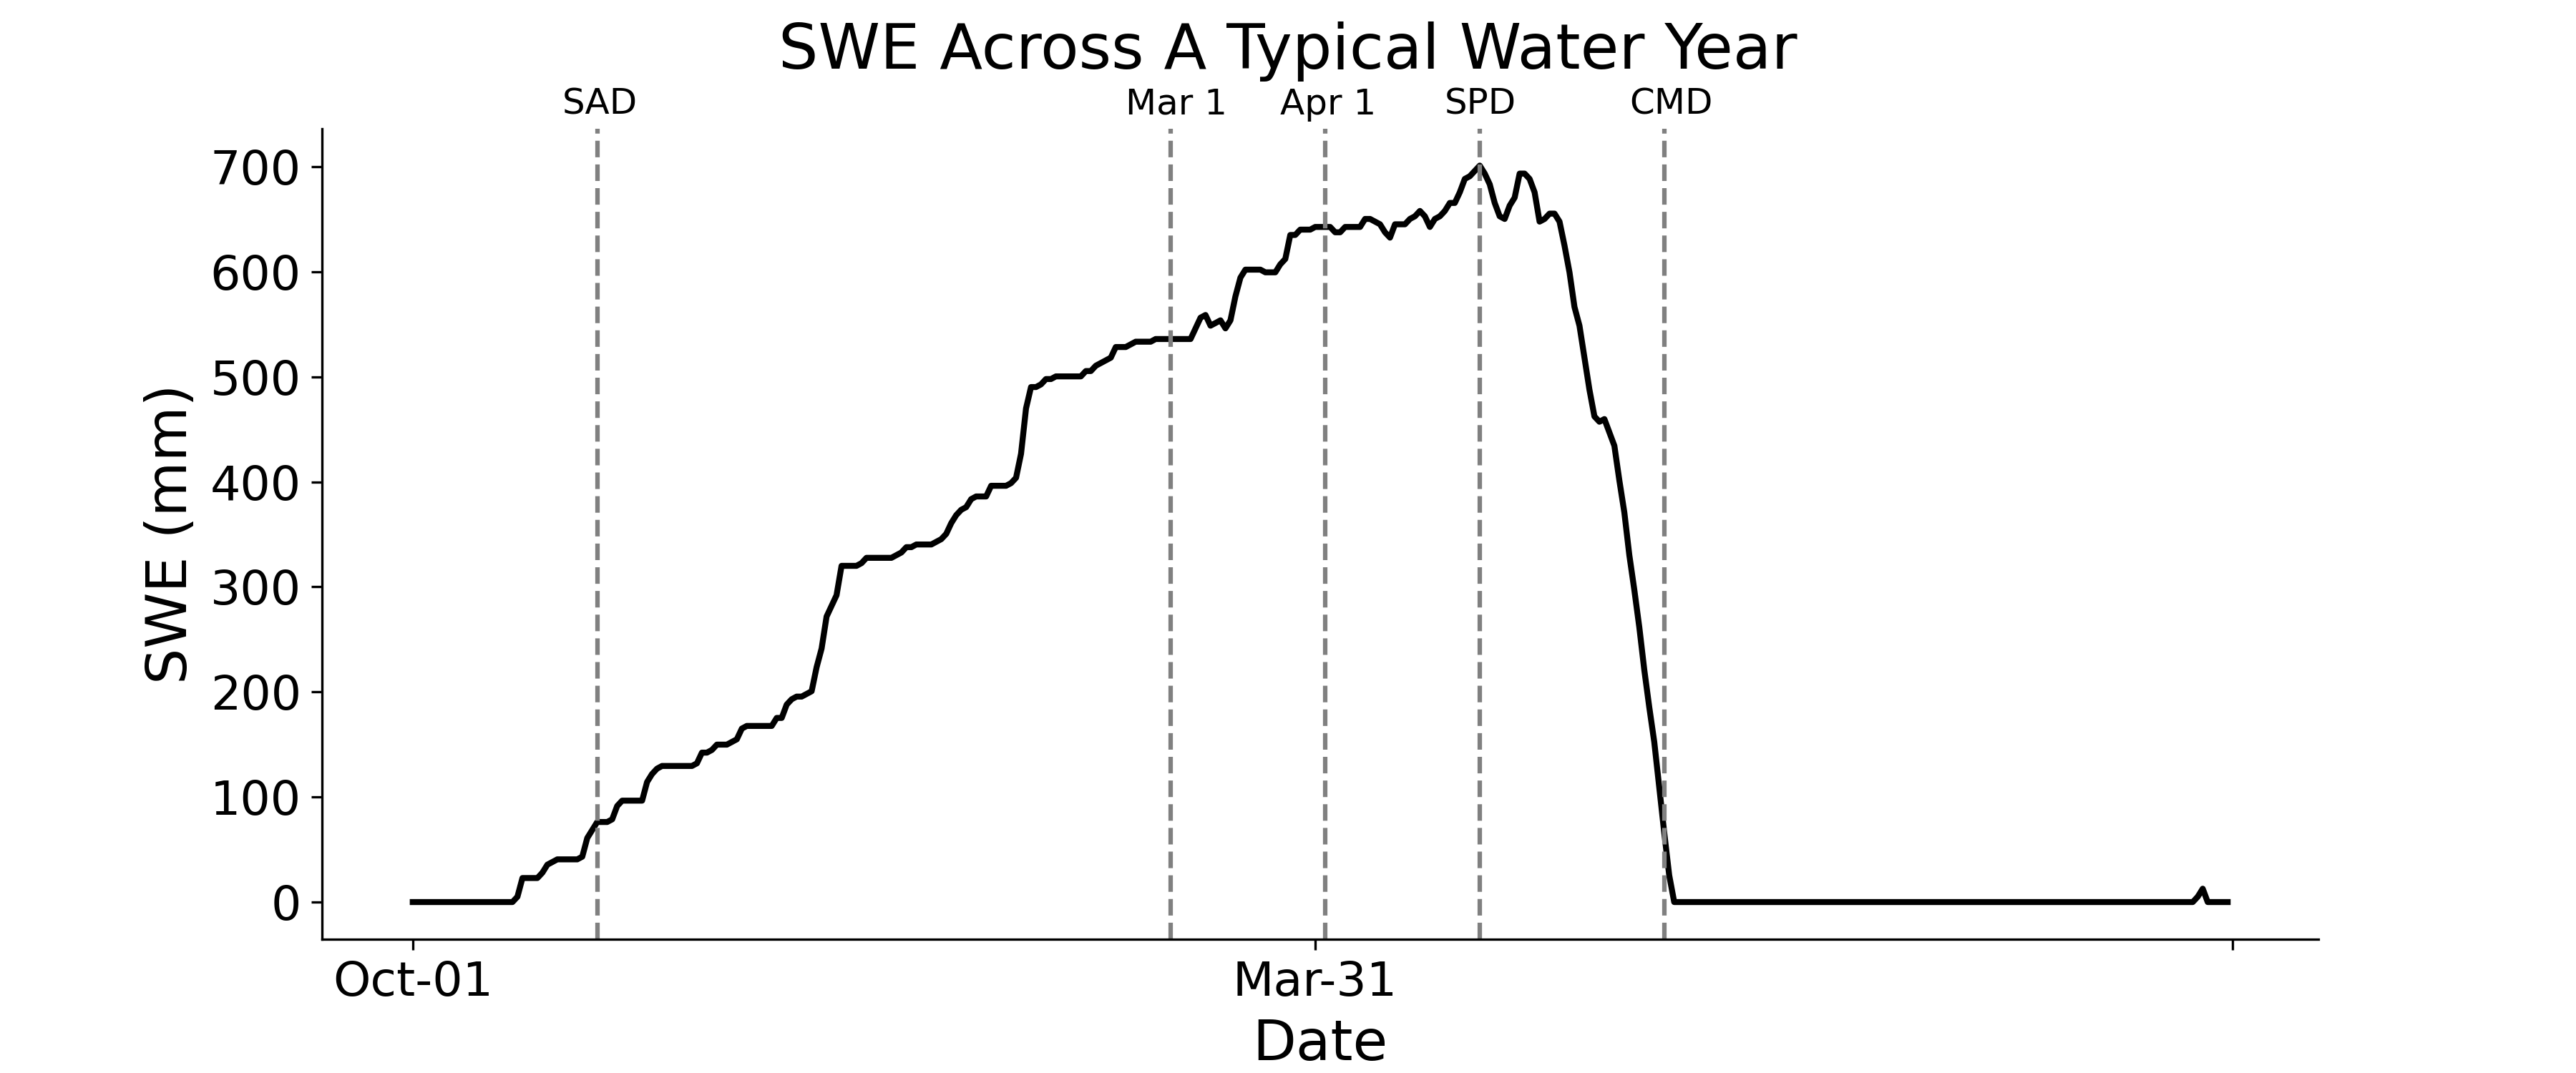

In [2]:
# Figure of SWE annual cycle 
Image(filename = "figures/annual_cycle.png", width=1000, height=1000)

### SWE Datasets

#### Observations

Some main observation data networks that measure SWE include: 
* **SNOTEL**: Takes measurements of SWE, SD, T, P
SWE is measured using snow pillows, P measured using gage, and T and SD measured via sensors.
* **ASO**: Airborne measurements converted to SWE
Snow depth and snow density information is derived from data, on variables such as albedo, collected using an image spectrometer and scanning lidar system during flights. SWE is then obtained from combining the SD and snow density information into a model. 
* **NOAA NOHRSC**:
SWE and SD data derived from ground, airborne, and satellite data from multiple sources as inputs into a land surface model for snow and soil & a snow data assimilation system
* **CSO**: 
SD measured by citizen scientists using snow probes during personal excursions
SWE is then simulated by a snow model that takes as input CSO SD data and other relevant covariates.

While observation data provide incredible value, as they provide true groundtruth data, there exist some limitations. First, measurement errors inevitably occur, as mishaps with sensors or other equipment happen from time to time. Second, spatiotemporal gaps exist, since measurements taken at single point locations are intrinsically limited by a lack of confidence in how they capture the landscape mean across coarse grid cells (Meromy et al., 2012), which is particularly problematic in areas of mixed forest vegetation, open areas prone to wind redistribution, and complex topography (most snow-covered regions fall into at least one of these categories).

To address these limitations, measurement bias correction methods and gridded products have been developed. Specifically, gridded products are developed using statistical and model-based methods that combine point-level observations and/or outputs from atmospheric reanalyses to produce spatially and temporally consistent SWE data.

#### Gridded Products

Some commonly used SWE gridded products include:
* **Livneh**
One-sentence description of generating method: Interpolate and scale precipitation and temperature observations and then feed the processed precipitation and temperature data as well as wind data into a land surface model. 
~6km spatial resolution, spanning Mexico, CONUS, and South Canada.
Daily time scale, 1985-2013 [1985-2020 for L21]
* **UofA**
One-sentence description of generating method: Scale interpolate scaled SWE observations with temperature and precipitation data.
4km spatial resolution, spanning CONUS.
Daily time scale, 1982-2016
* **ERA5**
One-sentence description of generating method: Feeds into a land surface model many sources of satellite and in-situ data 
31km spatial resolution, spanning North America.
Hourly time scale, with daily update, 1979-2014
* **UCLA WUS SR**
One-sentence description of generating method: Bayesian reanalysis
90m spatial resolution, spanning the Western US
Daily time scale, 1985-2019

Gridded products are immensely useful; however, there still exist limitations. First, many methods, such as Livneh and UA SWE, that utilize point measurements include some kind of smoothing or interpolation in the gridding process. These assumptions add additional uncertainty, at times up to 60% of differences observed in estimates of Western US wide peak SWE (Siirla, Rhoades, et al. (2019)). Furthermore, methods, such as Livneh and ERA5, utilize a physical model in the gridding procedure. The use of such models also adds uncertainty and error to the final estimates. Additionally, spatial variability in SWE due to topographic and land cover heterogeneity cannot be adequately captured by data with relatively coarse spatial resolution. Related to the relatively coarse spatial resolution, another limitation lies in the limited ability of gridded products to estimate extremes.  

## Objective

Given the importance of spatially and temporally consistent estimates of SWE and the uncertainty in estimates across SWE products, our goal is to investigate, quantify, and importantly decompose the sources of error underlying gridded products, starting with UA SWE as it is relatively intuitive in the UCRB for the 1985-2015 WY.

Specifically, we organize the study as follows: first, we reconstruct the UA SWE algorithm from scratch, as the code is not ready to be made publicly available, then we conduct a sensitivity analysis on the UA SWE product to understand the relative importance of major components in UA SWE, and finally we develop a error decomposition to quantify the amount of error attributed by each of the major components in UA SWE.

In [3]:
# Mathematical formulation of objective

## Study Area

We focus our study on the Upper Colorado River Basin (UCRB), a river network spanning (northern) Arizona, (western) Colorado, (northern) New Mexico, (eastern) Utah, and (southern) Wyoming.

The reason for our decision to focus our study on the UCRB region is two-fold:
1) The importance of the UCRB in providing water resources:
Most important water source for the US Southwest: Provides water to nearly 40 million people (primarily through winter snowpack)
Drives a $1.4 trillion economy, including for agricultural, industrial, and recreational use (~7th largest country by economic output)
The river's natural flow is highly influenced by snowpack in the Rocky Mountain headwaters subbasins, which account for over 70% of the river's annual streamflow (Li et al. (2017), Xiao et al. (2021))
2) Several data collection campaigns have been launched in recent years in various parts of the UCRB, specifically the DOE SAIL and SPLASH campaigns that provide high quality state-of-the-art observation temperature and precipitation data that we hope to leverage in the future, as well as the ASO data mentioned previously that produce fine-grain data in certain watersheds within the UCRB.

In [4]:
# Figure of UCRB map


## Data

The UA SWE product combines **SNOTEL** in-situ temperature, precipitation, and SWE data, with **PRISM** gridded temperature and precipitation data to produce gridded SWE estimates at daily 4km x 4km resolution.

In [5]:
# Plot of SNOTEL and PRISM for the UCRB


In our error analysis, we also take advantage of the following datasets:
* **GridMET**
* **Livneh**
* **Jennings**

In [6]:
# Plots of PRISM/Gridmet/Livneh and Jennings


## Methods: UA SWE Reconstruction

### UA SWE Reconstruction

Let:
* $o$ : observation
* $w$ : net snowfall
* $a$ : snow accumulation
* $b$ : snow ablation
* $\phi$ : interpolation (ordinary kriging with spherical variogram, range = 20km, sill = 0.2, and nugget = 0)

Under the UA SWE algorithm, SWE is estimated by:
$$
\begin{align} 
\text{UA SWE} & = \phi \left(\frac{o_{SNTL}}{w_{SNTL}}\right) (w_{PRISM}) \\
& = \phi \left(\frac{o_{SNTL}}{a_{SNTL} - b_{SNTL}}\right) (a_{PRISM} - b_{PRISM}) 
\end{align}
$$

Defining $S$ as snowfall and $d$ as cumulative degree days, snow accumulation $a$ and snow ablation $b$ are defined by:
$$ a = \sum_{t=0}^{t_{max}} S_t $$
$$ b = \hat{\beta}_0 + \hat{\beta}_1 d + \hat{\beta}_2 d^2 $$

Occurrance of snowfall $s$ on each day is determined by a rain-snow partitioning, $Th$, which relies on SWE or temperature $T$. Snowfall quantity is dependent on precipitation $P$. 

In the case of SNOTEL, the partitioning depends on SWE:
$$
\begin{equation}
S = 
    \begin{cases}
        P & \text{if SWE$_t$ $<$ SWE$_{t-1}$} \\
        0 & \text{else} 
    \end{cases}
\end{equation}
$$

For PRISM, the partitioning is based on temperature:
$$
\begin{equation}
S = 
    \begin{cases}
        P & \text{if $T < 2^\circ$C} \\
        0 & \text{else} 
    \end{cases}
\end{equation}
$$

In words, the UA SWE product estimates SWE by 

In [7]:
# Some plots of reconstrcted UA SWE


#### Filling in the Gaps

### Components / Sources of Uncertainty

To understand the relative importance and impact of the different components that make up the SWE estimates derived from the UA SWE algorithm, we first identify the major components or sources of uncertainty in the UA SWE algorithm. Because we are interested in evaluating the SWE estimates at sites where there is ground-truth observation data that can be used as a baseline for comparison, we keep SNOTEL point measurement data used in the UA algorithm fixed.

Thus, outside of SNOTEL point measurement data, the main components in the UA SWE algorithm are temperature, precipitation, the rain-snow partitioning threshold, and the interpolation method used to smooth the SNOTEL ratio. We substitute different datasets or schemes for each of these main components and re-run the algorithm to produce SWE estimates at both the site- and grid- level. We substitute PRISM precipitation and temperature with Gridmet and Livneh, the fixed $2^\circ$C rain-snow partitioning temperature threshold with the dynamic Jennings threshold, and the default ordinary kriging with inverse distance weighting as well as ordinary kriging with a nonzero nugget. The following table summarizes the major components and substitutions.

| Component | Dataset |
| :---: | :---: |
| Precipitation (P) | PRISM | 
|  | GridMET | 
|  | Livneh |
| Temperature (T) | PRISM | 
|  | GridMET | 
|  | Livneh |
| Rain-Snow Partitioning Scheme (Th) | 2$^\circ$C |
|  | Jennings |
| Interpolation ($\phi$) | Ordinary Kriging (OK) |
|  | Inverse Distance Weighting (IDW) | 
|  | Ordinary Kriging with Nonzero Nugget (OK+n) | 

In [8]:
# plots from runs


## Results: Point-Level Analysis

We first conduct a site- or point-level analysis to evaluate errors at the SNOTEL sites. The point-level analysis was conducted on results from runs that omit the interpolation of SNOTEL ratios, thus quantifying the effects of temperature, precipitation, and rain-snow partitioning threshold on UA SWE estimates.

### Sensitivity Analysis

We use analysis of variance (ANOVA) to partition the total variance in the SWE estimates produced by the UA SWE algorithm. In other words, ANOVA is used to evaluate the contribution of each source of uncertainty to the total predicted uncertainty in UA SWE. 

ANOVA splits up the total sum of swquares (SST) into sums of squares due to the individual effects:

$$ SST = SS_{P} + SS_{T} + SS_{Th} + SSI $$

$$ 
\begin{align}
SST & = SS_{P} + SS_{T} + SS_{Th} && + && SSI \\
& = \text{main effects} && + && \text{interatctions}
\end{align}
$$

Since the individual interaction we're particularly interested in is the precipitation and temperature interaction, we can write the above as follows:

$$ 
\begin{align}
SST & = SS_{P} + SS_{T} + SS_{Th} && + && SS_{P:T} + SSI \\
& = \text{main effects} && + && \text{interatctions}
\end{align}
$$

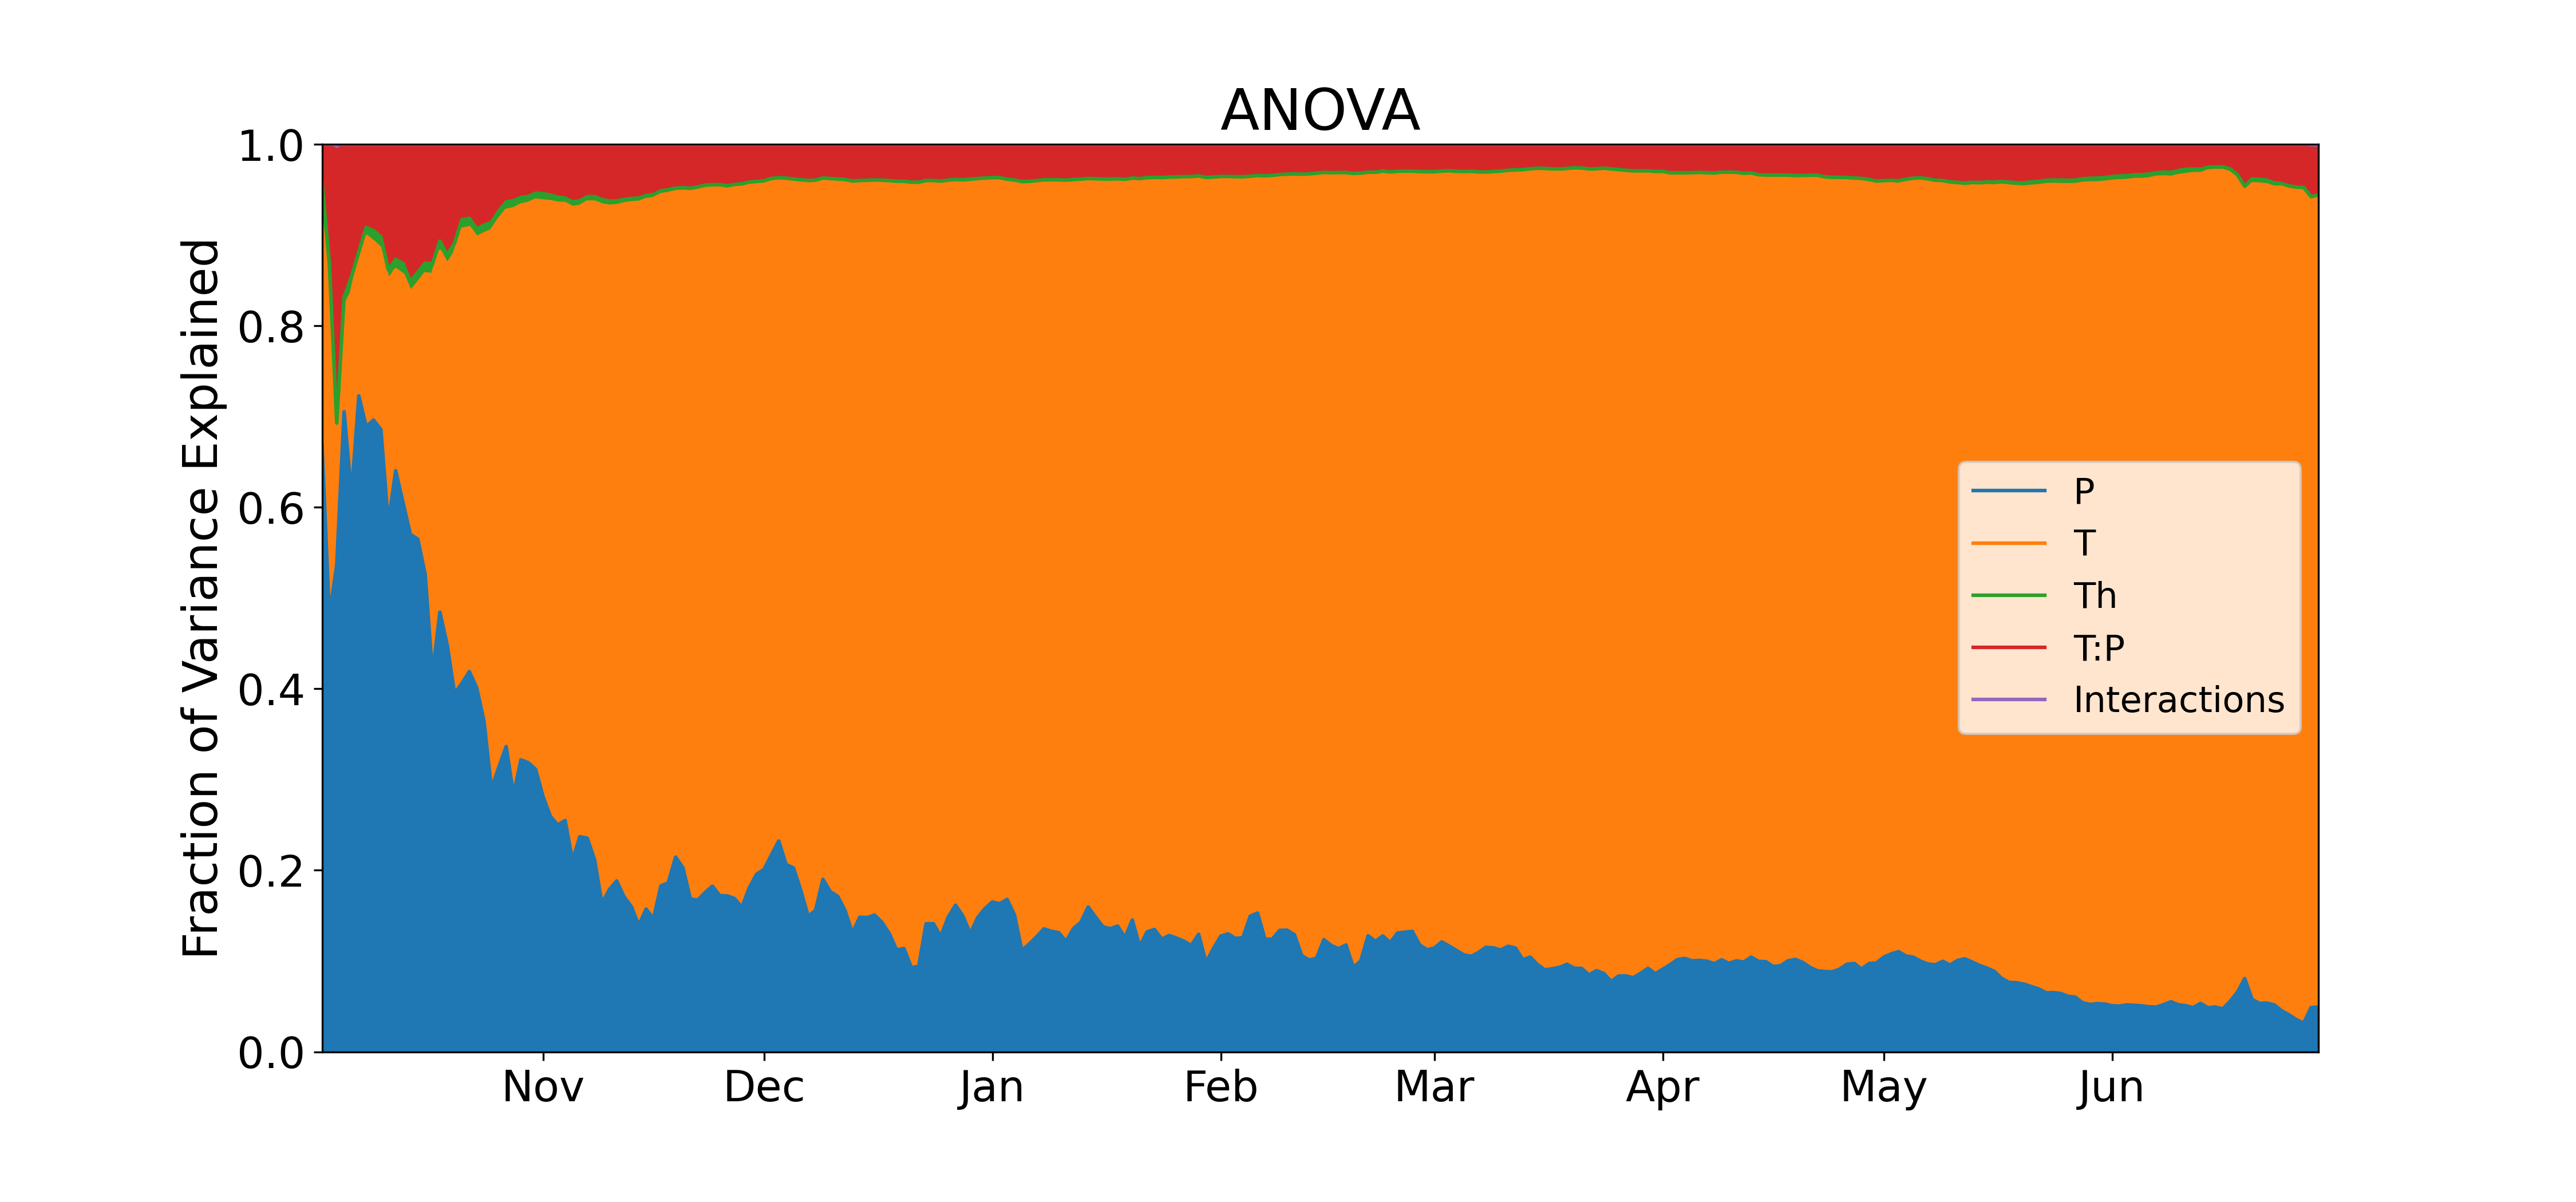

In [9]:
Image(filename = "figures/anova_pt_lvl.png", width=1000, height=1000)

### Error Decomposition

To quantify the error contributed by each source of uncertainty, we focus on the PRISM net snowfall component in the UA SWE algorithm. We can think of the error decomposition setup as building blocks adding steps of error components. At the base is SNOTEL observed SWE, which equates to using SNOTEL T and P data instead of PRISM data to compute the PRISM net snowfall component (when the interpolation of SNOTEL ratios is ignored). The next step is the SWE as estimated by UA SWE, which equates to using PRISM T and P data to compute PRISM net snowfall. The next step beyond that consists of either using gridMET/Livneh T and/or P data instead of PRISM data, or using the variable Jennings rain-snow partitioning threshold instead of the $2^\circ$C assumption, to compute the PRISM net snowfall component.

This is illustrated in the figure below. 

In [10]:
# Error decomposition steps plot


For each step $i$, we compute the peak SWE error by comparing the estimated peak SWE from the step $i$ run to the estimated peak SWE from the step $i-1$ run. Mathematically:

$$ 
\epsilon_i = \frac{\hat{SWE}_{i} - \hat{SWE}_{i-1}}{\hat{SWE}_{i-1}}
$$


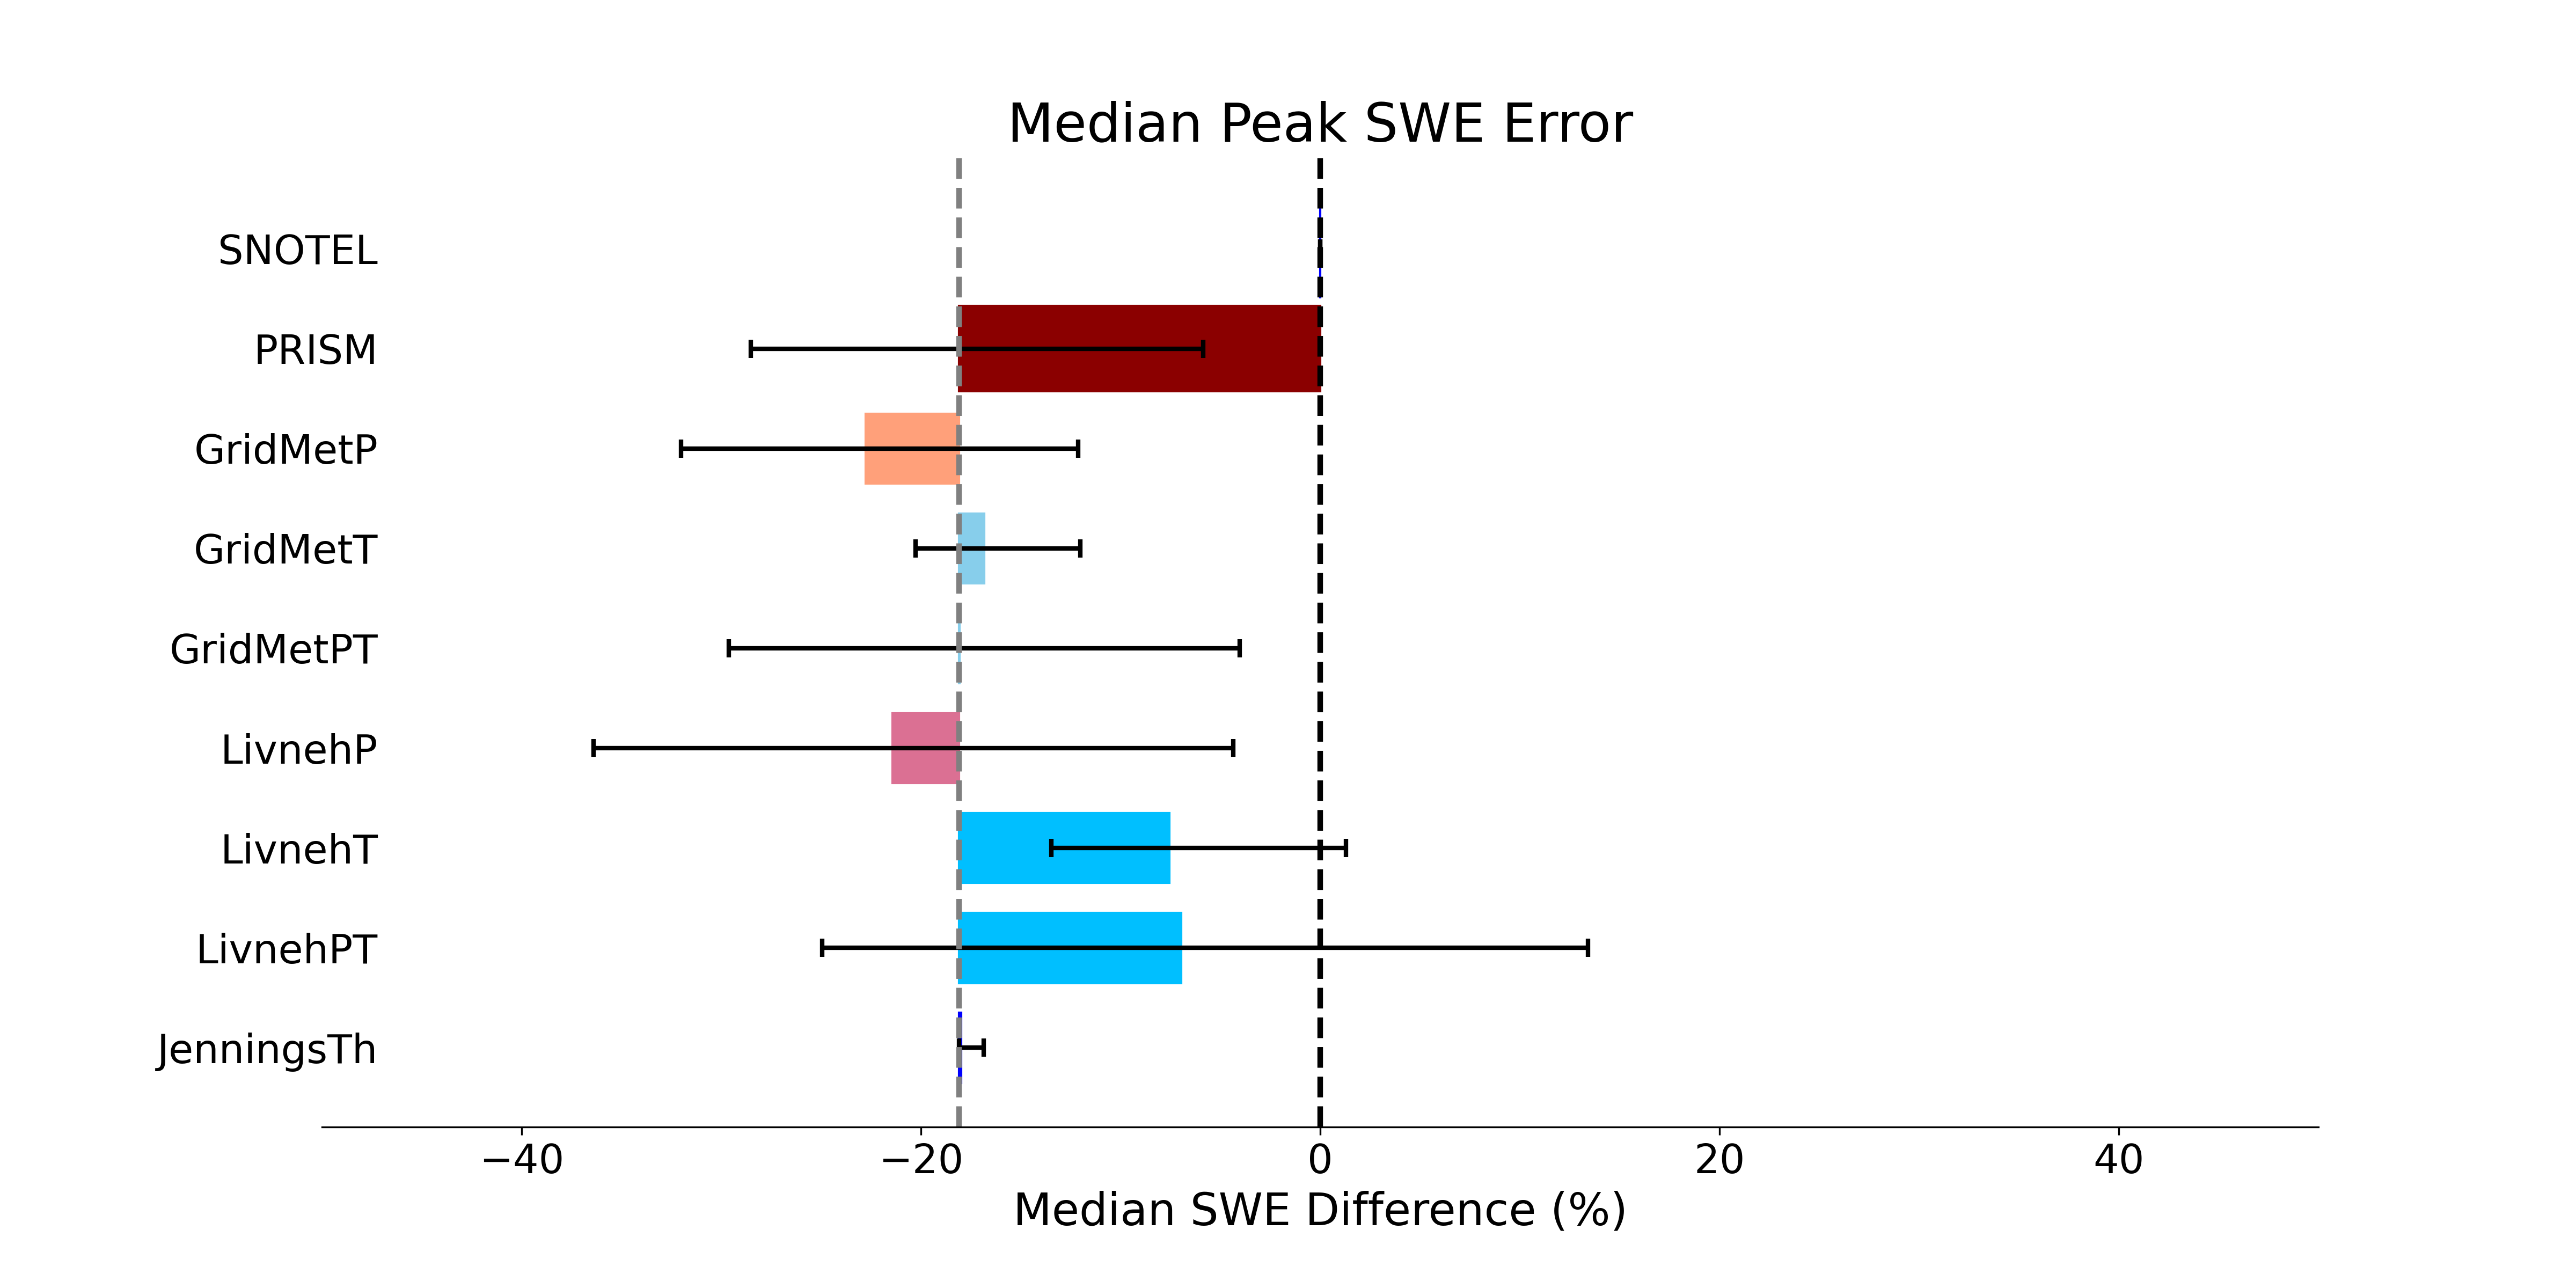

In [11]:
Image(filename = "figures/error_pt_lvl.png", width=1000, height=1000)

## Results: Grid-Level Analysis

Next, we conduct a grid-level analysis to the effect of the SNOTEL ratio interpolation, which was skipped in the point-level analysis. The grid-level analysis quantifies the effect of ordinary kriging on UA SWE estimates.

### Sensitivity Analysis

As in the point-level analysis, we use analysis of variance (ANOVA) to partition the total variance in the SWE estimates produced by the UA SWE algorithm. The only difference in the grid-level analysis is that kriging is included as a factor in the ANOVA setup.

ANOVA splits up the total sum of swquares (SST) into sums of squares due to the individual effects (for the point-level analysis,

$$ SST = SS_{P} + SS_{T} + SS_{Th} + SS_{\phi} + SSI $$

### Error Decomposition

To evaluate the effect of the UA SWE estimates on a grid-level, we include kriging in the generation of UA SWE and run the UA SWE algorithm substituting the various components including the kriging component. 

## Discussion

### Point-Level Analysis

* UA SWE underestimates SNOTEL SWE.
    - Resolution could partially explain why UA SWE underestimates SNOTEL SWE at SNOTEL sites.
* Precipitation is the dominant factor that impacts the variability in UA SWE early in the snow season; as ablation begins to increase in October, temperature becomes the dominant factor influencing UA SWE variability. This influence persists throughout the rest of the snow season. This is because early in the season, snow accumulation plays a dominant role and precipitation data only plays a role in affecting snow accumulation; however, ablation begins to accumulate around mid-October and since ablation is solely determined by temperature data in UA SWE, temperature begins to play a increasingly larger role in influencing UA SWE variability beginning around mid-October.
* Because Jennings rain-snow partitioning threshold is greater than $2^\circ$C in the UCRB, using a dynamic rain-snow partitioning scheme does not significantly affect or improve UA SWE estimates.
* Using gridMET or Livneh precipitation in lieu of PRISM precipitation in UA SWE increases SWE error, on average.
* Using gridMET or Livneh temperature in lieu of PRISM temperature in UA SWE reduces the SWE error, on average.
    - In particular, because of Livneh temperature lapse rate correction (i.e. correcting for elevation), UA SWE produced with Livneh T in place of PRISM T reduces the SWE error in relation to SNOTEL. This suggests a benefit in Livneh's decision to correct temperature with a lapse rate.
* Our method allows us to evaluate the individual efffects of the because the interaction between T and P masks the individual effects in different ways. In gridMET, for example, the interaction between T and P cancel out the positive and negative errors produced by the individual T and P components. In Livneh, however, the interaction effect is additive/multiplicative.

### Grid-Level Analysis

## Conclusion

* There are negative biases in the UA SWE product's representation of seasonal snow accumulation. "Biases in snow accumulation will impact other aspects of the hydrologic cycle, such as runoff and soil moisture. These biases will reach beyond mountain areas, affecting assessment of water resources and hydrologic hazards for regions downstream." (Wrzesien et al. (2019))
* Uncertainty in the UA SWE algorithm comes primarily from temperature data used. This temperature influence is exhibited beginning when ablation starts to occur in the snow season. Precipitation also contributes to the uncertainty, but its major influence lies in the beginning of the snow season before ablation begins.
* Using Gridmet or Livneh temperature in place of PRISM temperature can help reduce UA SWE error in the seasonal snow accumulation period.
* Lapse rate correction in temperature data is useful, as exhibited via Livneh evaluated in SWE.
* Understanding the effect of various products on the UA SWE estimates not only helps guide SWE model development, highlighting areas to focus on when working to improve gridded product (or physical model), but also helps assess the performance of gridded T and P products, which are often used for modeling other phenomena, including SWE. 

## Future Directions

As demonstrated by our analysis, there is room to improve SWE estimation (improve underestimation of UA SWE, minimize the errors produced by the various components). Two promising directions for improving gridded SWE estimates could be 1) by improving the interpolation of SWE; and 2) by accounting for the non-representativeness of observational data used.

Interpolation plays a key role in many gridding methodologies, including in UA SWE. By default, the UA SWE algorithm interpolates the SNOTEL ratios independently for each day using ordinary kriging with spherical variogram with fixed parameters of 20km range, 0.2 sill, and a zero nugget. While the range and sill parameters were determined by the authors of the UA SWE product to be optimized for SNOTEL ratios across CONUS, the decision for a nugget of zero can be questioned. 

SNOTEL non-representativeness: 1) spatial heterogeneity of SNOTEL sites (located at scattered and some clustered areas); 2) location of SNOTEL does not represent nearby environmental conditions (e.g. SWE of area in close proximity to sites can fall into the same grid cell but vary drastically, same with temperature and precipitation?); 3) SNOTEL sites don't cover the range of altitudes (e.g. SNOTEL sites located mostly at mid-altitudes (confirm)?);
* Can we find a relationship between SNOTEL site locations and covariates? i.e. to make a statistical statement about connection between some static or dynamic physical variable and SNOTEL site location
* Is there any way to improve SNOTEL representativeness by incorporating some correction or information based on other covariates?

Future projections

## References